In [1]:
import numpy
from galpy.util import bovy_plot
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# ABC inference of upper limit on star-formation timescale from lack of CCSN

The ABC sampling assuming K stars that go CCSN in tccsn years:

In [2]:
def sftime_ABC(n=100,K=1,tccsn=4.,tmax=20.):
    out= []
    for ii in range(n):
        while True:
            # Sample from prior
            tsf= numpy.random.uniform()*tmax
            # Sample K massive-star formation times
            stars= numpy.random.uniform(size=K)*tsf
            # Only accept if all go CCSN after SF ceases
            if numpy.all(stars+tccsn > tsf): break
        out.append(tsf)
    return out

The PDF for 1, 2, and 5 CCSN

In [3]:
pdf_1ccsn= sftime_ABC(n=100000)
pdf_2ccsn= sftime_ABC(n=100000,K=2)
pdf_5ccsn= sftime_ABC(n=100000,K=5)

/Users/bovy/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:12: RuntimeWarning: divide by zero encountered in divide



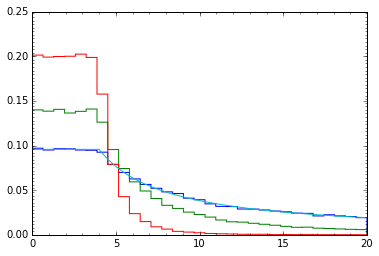

In [4]:
dum=bovy_plot.bovy_hist(pdf_1ccsn,range=[0.,20.],
                    bins=31,normed=True,
                    histtype='step')
dum=bovy_plot.bovy_hist(pdf_2ccsn,range=[0.,20.],
                    bins=31,normed=True,
                    histtype='step',overplot=True)
dum=bovy_plot.bovy_hist(pdf_5ccsn,range=[0.,20.],
                    bins=31,normed=True,
                    histtype='step',overplot=True)
#My analytical calculation for 1
xs= numpy.linspace(0.,20.,1001)
ys= 4./xs
ys[xs < 4.]= 1.
ys/= numpy.sum(ys)*(xs[1]-xs[0])
plot(xs,ys)

And the 95% confidence limits

In [5]:
print numpy.percentile(pdf_1ccsn,95)
print numpy.percentile(pdf_2ccsn,95)
print numpy.percentile(pdf_5ccsn,95)

17.5804236339
13.7889352021
5.65371259035


For 11 lighter CCSNe with 6 Myr lag

In [6]:
pdf_11ccsn= sftime_ABC(n=100000,K=11,tccsn=6.)
print numpy.percentile(pdf_11ccsn,95)

6.37299120856


So both limits are about t_SF < 6 Myr at 95% confidence